# Lead Scoring Case Study

##  Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company gets lead from website and search engines. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Steps involved:
    A. Importing library and dataset
    B. Exploratory Data Analysis:
            Cleaning
            understanding data
            Visiual Representation of data
    C. Data Preperation for model:
            Creating Dummies
            Checking for data imbalance
            Spliting dataset
            Scaling
    D. Model building:
            Feature Selection using RFE
            Models
    E. Model Evaluation
            Initial prediction based on 0.5 probability
            Accuracy Score
            Precision Score
            Recall Score
            ROC
            Finding Optimal cutoff point
            Precision and Recall Trade off
    F. Making Prediction on test dataset:
            Sacaling the numeric variables in test dataset
            Prediction based on 0.45 threshold 
            Evaluation matrix 

# A. Importing library and dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Graph style
sns.set_style("darkgrid")

In [4]:
# import data set

df= pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# B. EDA

## Data Cleaning

In [5]:
# dimesnsions of dataset
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Check for dplicate values
#df.drop_duplicates().shape
if df.duplicated().sum()==0:
    print('\nDataframe doesnot have duplicate values\n')
# No duplicate values is present in dataset


Dataframe doesnot have duplicate values



In [8]:
# By first impression Prospect ID is of no use, So Dropping Prospect ID columns

df.drop(columns='Prospect ID',axis=1, inplace=True)

In [9]:
#Check for null values present in datasets
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [10]:
# Precentage of null values

round((df.isnull().sum()/df.shape[0])*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# dropping columns with null value more than 45%

for col in df.columns:
    if round((df[col].isnull().sum()/df.shape[0])*100)>=45:
        df.drop(col, axis=1, inplace=True)

In [12]:
# Precentage of null values

round((df.isnull().sum()/df.shape[0])*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened


In [14]:
# checkng the values of categorical variables

for col in df.columns:
    print("\n-------------",col,"-------------")
    print(df[col].astype('category').value_counts())


------------- Lead Number -------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64

------------- Lead Origin -------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

------------- Lead Source -------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_H

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

------------- I agree to pay the amount through cheque -------------
No    9240
Name: I agree to pay the amount through cheque, dtype: int64

------------- A free copy of Mastering The Interview -------------
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

------------- Last Notable Activity -------------
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Mar

From the above we can infer that they are not required in our analysis because most of the values are 'No' which will bias our data.So to get rid of this we will drop the variables below:


<b>'Do Not Call','Country', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'

In [15]:
# dropping the variables

df.drop(['Do Not Call','Country', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
         'Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace = True)

In [16]:
# ONCE AGAIN checkng the values of categorical variables

for col in df.columns:
    print("\n-------------",col,"-------------")
    print(df[col].astype('category').value_counts(normalize  = True))


------------- Lead Number -------------
579533    0.000108
629593    0.000108
630390    0.000108
630403    0.000108
630405    0.000108
            ...   
602534    0.000108
602540    0.000108
602557    0.000108
602561    0.000108
660737    0.000108
Name: Lead Number, Length: 9240, dtype: float64

------------- Lead Origin -------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

------------- Lead Source -------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat       

In [17]:
# checking categorical variables with 'Select' label
# printing count and percentage having 'Select' label 

print('Select_Counts',"   ",'Percentage',"    ",'Column Name')
print("*********************************************")
for col in df.columns:
    col1 = df[col].isin(['Select'])
    if df[col1].shape[0] != 0:
        print(df[col1].shape[0],"              ",round(100*(df[col1].shape[0]/len(df)),2),"       ",col)

Select_Counts     Percentage      Column Name
*********************************************
1942                21.02         Specialization
5043                54.58         How did you hear about X Education
4146                44.87         Lead Profile
2249                24.34         City


In [18]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<b> - The option 'Select' means the customer had not selected any option from the drop down menu while filling the form.

<b>- Specialization (21.02%), How did you hear about X Education (54.58%) and Lead Profile (44.87%) have 'Select' option in it.

<b>- Variable 'What matters most to you in choosing a course' has a level 'Better Career Prospects' having 6528 rows and other two levels have 2 and 1 rows respectively so it is better to drop the variable.
    
    
 <b><u> Dropping columns
     
 <b>      'How did you hear about X Education'
     
 <b>      'Lead Profile'
     
 <b>      'What matters most to you in choosing a course' columns.

In [19]:
df.drop(['How did you hear about X Education', 'Lead Profile', 'What matters most to you in choosing a course'], axis = 1, inplace =True )

In [20]:
# Now, Precentage of null values

round((df.isnull().sum()/df.shape[0])*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
Tags                                      36.29
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [21]:
# Checking tags column
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

<b> Dropping 'Tags', Because it is having more than 36% null values in it. Also we can see that it has many classes and it is also not adding anything to our analysis

In [22]:
df.drop(['Tags'],1,inplace=True)

In [23]:
df.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [24]:
# Dropping the remaining null values in one go.

df.dropna(axis = 0, inplace =True)

In [25]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,No,Email Opened


## Visual Representation of data

In [26]:
# Dividing dataset into categorical, numeric and target variables
df_cat = ['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization','What is your current occupation','City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

c_df = df[df_cat]

df_num = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit',]

n_df = df[df_num]

df_tar = ['Converted']

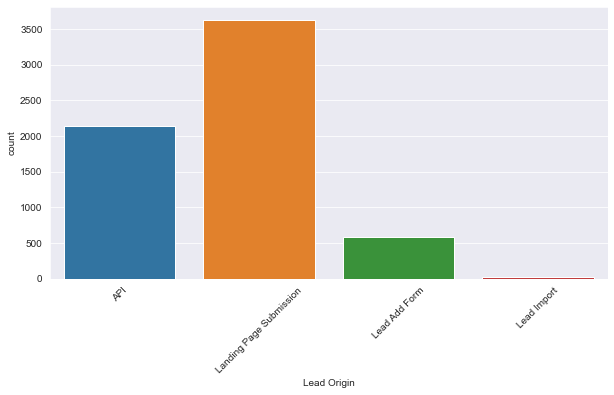

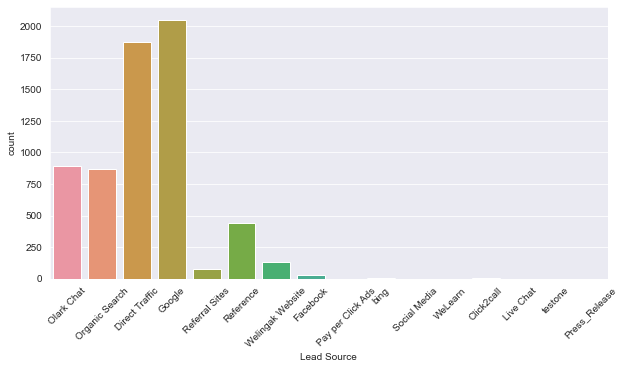

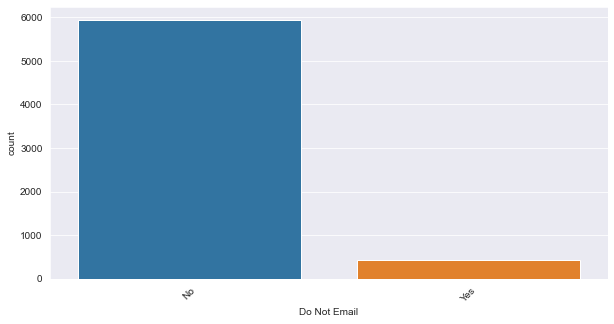

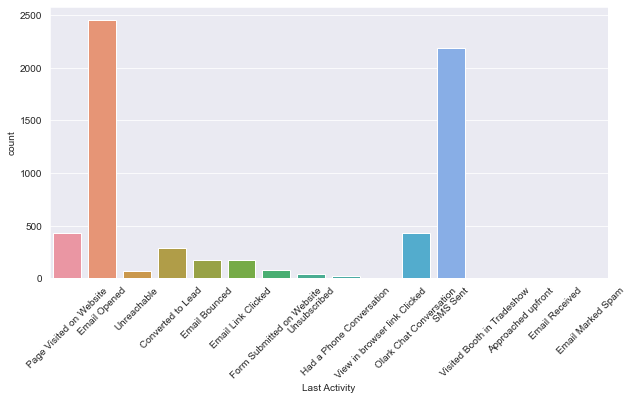

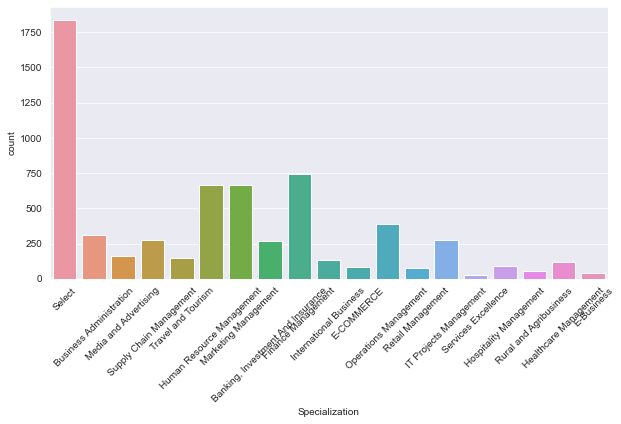

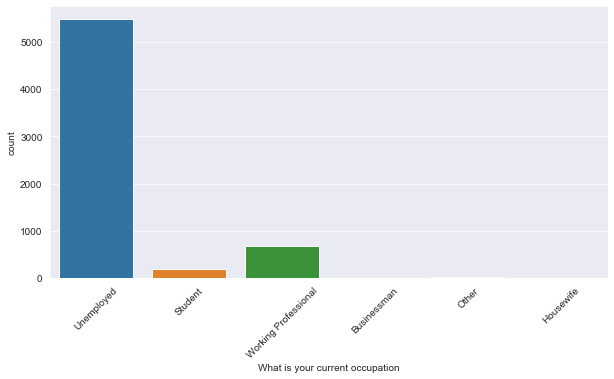

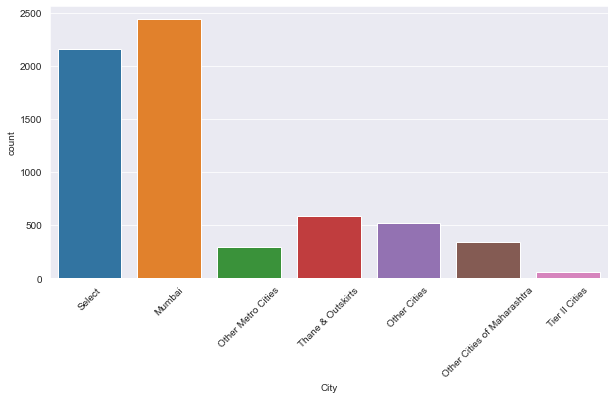

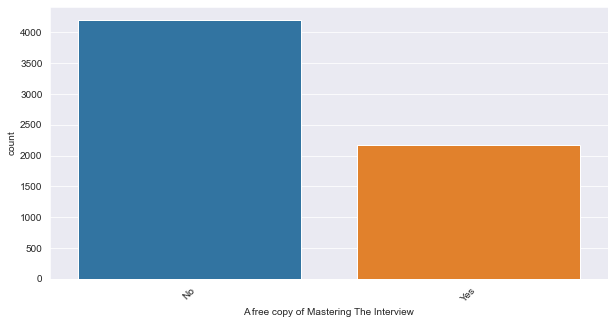

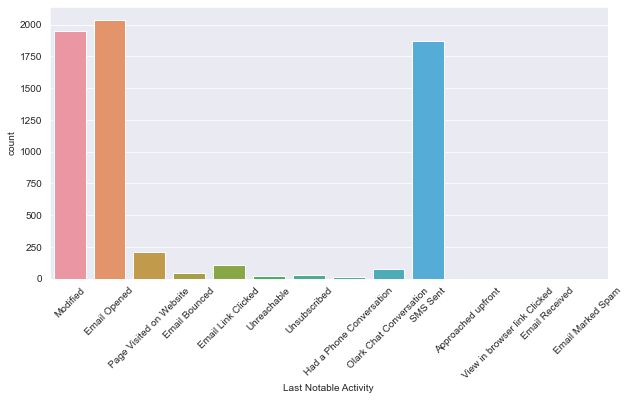

In [27]:
#  plot categorical Data

for i in c_df.columns:
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)
    sns.countplot(df[i])
plt.show()

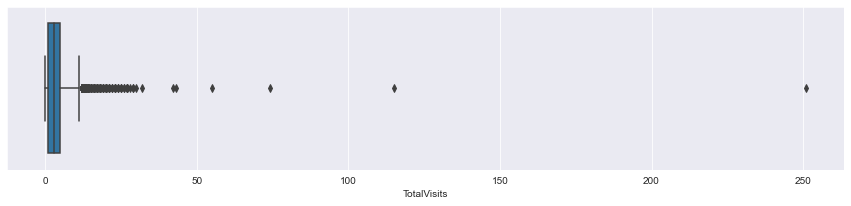

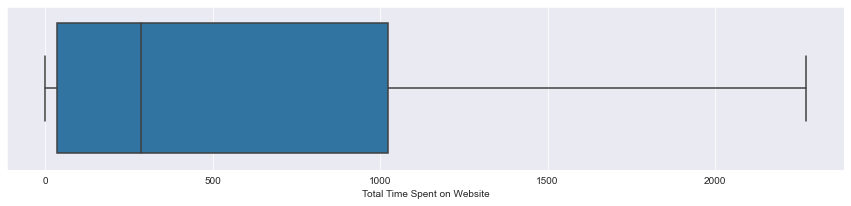

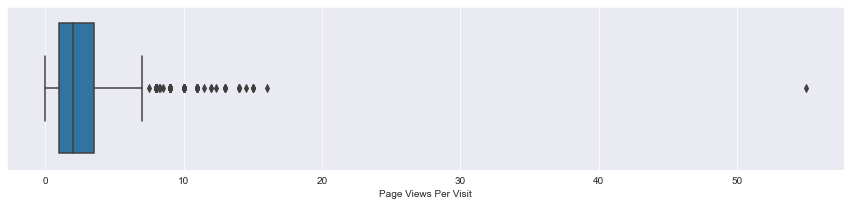

In [28]:
#  plot numerical Data

for i in n_df.columns:
    plt.figure(figsize=(15,3))
    sns.boxplot(df[i])
plt.show()

In [29]:
# Descriptive statistics for numeric dataset

n_df.describe(percentiles = [0.25,0.5,0.75,0.80,0.90,0.95,0.99]).transpose()

,count,mean,std,min,25%,50%,75%,80%,90%,95%,99%,max
TotalVisits,6373.0,3.624196,5.048555,0.0,1.0,3.0,5.0,5.0,8.0,10.0,18.00,251.0
Total Time Spent on Website,6373.0,535.224541,565.374753,0.0,34.0,287.0,1022.0,1149.0,1428.8,1592.4,1849.28,2272.0
Page Views Per Visit,6373.0,2.480464,2.167364,0.0,1.0,2.0,3.5,4.0,5.0,6.0,9.00,55.0


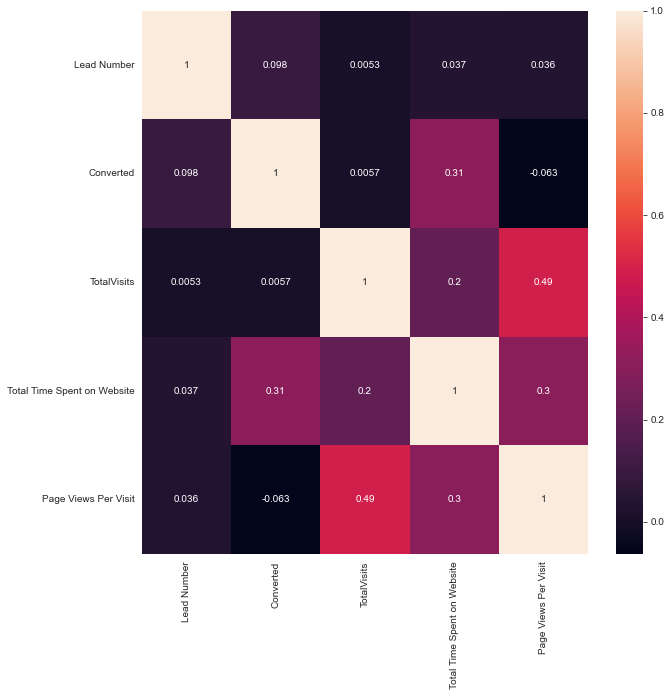

In [30]:
# Checking for correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# C. Data Preperation for model

In [31]:
# Convertimg Yes/No into 1/0's, in column 'Do Not Email' and 'A free copy of Mastering The Interview'

df['Do Not Email'] = df['Do Not Email'].replace({'Yes': 1, 'No':0}) 
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].replace({'Yes': 1, 'No':0})

In [32]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,0,Email Opened


#### Creating Dummies

In [33]:
# Seperating categorical variables for the creating dummies, prefix has been shorten for better representaion

dum1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation','Last Notable Activity']], 
                      prefix = ['Lead Origin', 'Lead Source', 'Last Activity', 'WIYCO', 'LNA'], drop_first=True)
dum1.shape

(6373, 51)

In [34]:
dum2 = pd.get_dummies(df['Specialization'], prefix='Specialization')
dum2.drop('Specialization_Select', axis=1, inplace=True )
dum2.shape

(6373, 18)

In [35]:
# joining the dataframes
dum = pd.concat([dum1, dum2], axis =1)
new_df = pd.concat([df, dum], axis =1)

In [36]:
# Droping orignal/repeated columns
new_df = new_df.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','City', 'Last Notable Activity'],axis=1)

In [37]:
new_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 76 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Number                                       6373 non-null   int64  
 1   Do Not Email                                      6373 non-null   int64  
 2   Converted                                         6373 non-null   int64  
 3   TotalVisits                                       6373 non-null   float64
 4   Total Time Spent on Website                       6373 non-null   int64  
 5   Page Views Per Visit                              6373 non-null   float64
 6   A free copy of Mastering The Interview            6373 non-null   int64  
 7   Lead Origin_Landing Page Submission               6373 non-null   uint8  
 8   Lead Origin_Lead Add Form                         6373 non-null   uint8  
 9   Lead Origin_Lead Im

#### Checking for data imbalance

In [39]:
round(new_df['Converted'].value_counts(normalize = True),2)

0    0.52
1    0.48
Name: Converted, dtype: float64

- The given data set is almost balanced condition.

#### Spliting dataset

In [40]:
# Splitting variables into dependent and independednt variables

X = new_df.drop(['Lead Number', 'Converted'], axis = 1)
y = new_df['Converted']

In [41]:
X.head(2)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the datset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=100) 

#### Scaling

In [44]:
# scaling the X_train dataset

scalar = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scalar.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
9192,0,1.486271,-0.442797,0.230949,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3516,0,0.389908,-0.761552,0.004050,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1888,0,0.663999,-0.407575,1.592345,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,-0.158273,-0.571356,0.230949,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,0,-0.432364,-0.823190,-0.222850,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


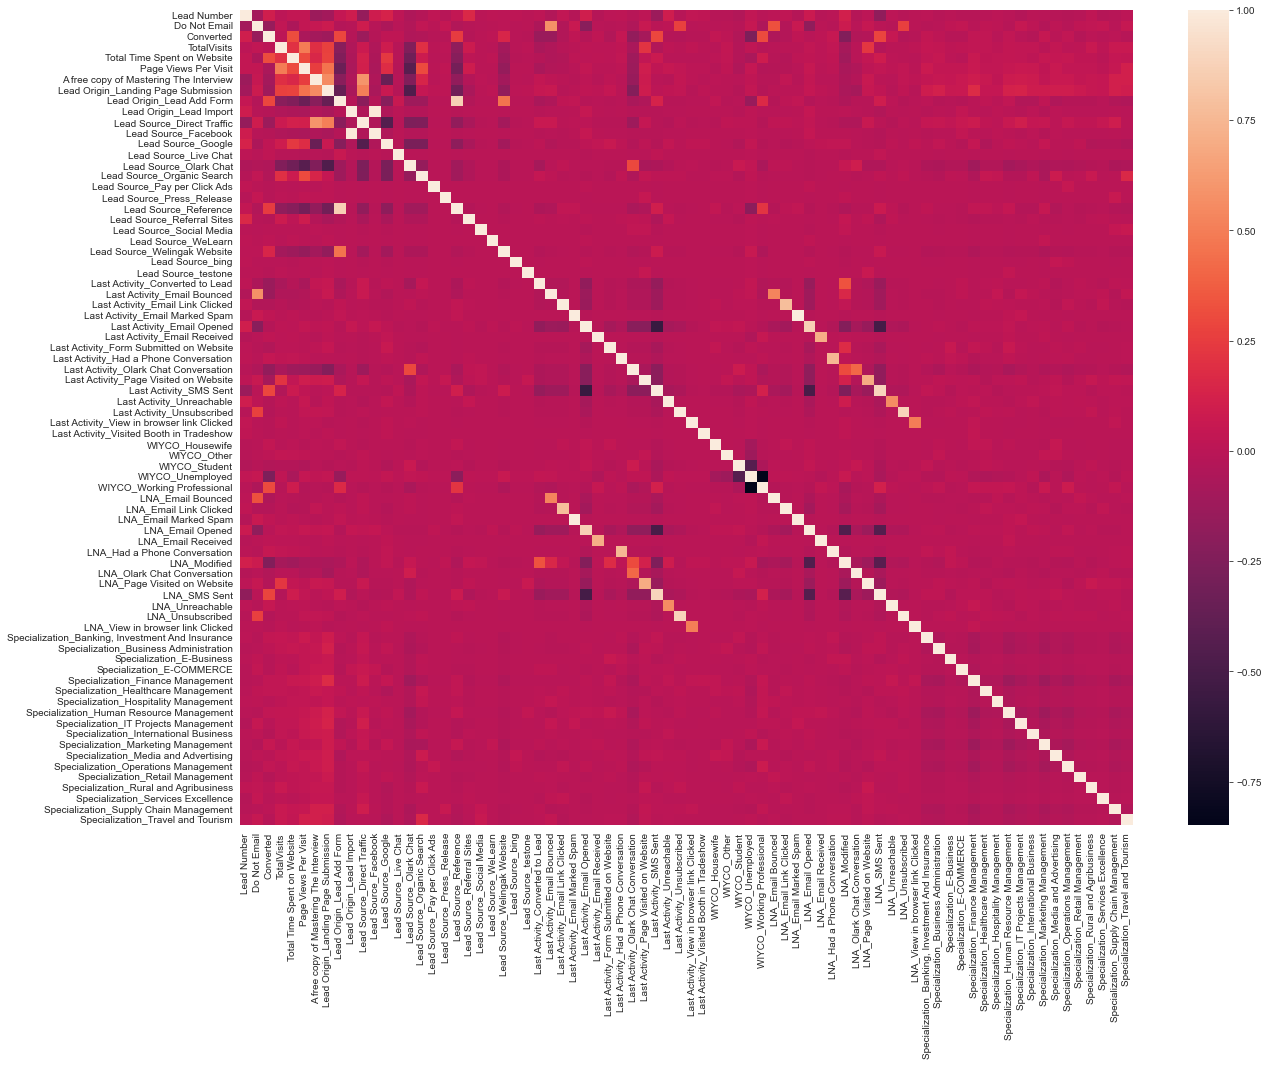

In [45]:
#looking at the corelation matrix

plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr())
plt.show()

## D. Model building

#### Feature Selection using RFE

In [46]:
# Create Logistic regression model

logreg = LogisticRegression()

In [47]:
# Instanciate RFE with 20 variables in it and fit it with train dataset

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [48]:
# List of variables based on their selection and ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 30),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_testone', False, 29),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Ema

In [49]:
# Looking at shortlisted variables
c_rfe = X_train.columns[rfe.support_]
c_rfe

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'WIYCO_Housewife', 'WIYCO_Student', 'WIYCO_Unemployed',
       'WIYCO_Working Professional', 'LNA_Email Opened', 'LNA_Modified',
       'LNA_Olark Chat Conversation', 'LNA_Unreachable',
       'Specialization_E-Business', 'Specialization_Healthcare Management'],
      dtype='object')

#### Model 1

In [50]:
# Building model

X_train_sm = sm.add_constant(X_train[c_rfe])    #Adding constant to the variables

# adopting Generalized Linear Model

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()) 
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4440
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.0
Date:                Sun, 11 Sep 2022   Deviance:                       4100.1
Time:                        00:40:34   Pearson chi2:                 4.54e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3143      0.597      0.526      0.599      -0.857       1.485
Do Not Email                              -1.1410      0.199     -5.738      0.000      -1.531      -0.751
Total Time Spent on Website                1.0986      0.047     23.606      0.000       1.007       1.190
Lead Origin_Landing Page Submission       -0.3030      0.100     -3.028      0.002      -0.499      -0.107
Lead Origin_Lead Add Form                  1.1709      1.009      1.160      0.246      -0.807       3.149
Lead Source_Olark Chat                     1.0832      0.136      7.971      0.000       0.817       1.350
Lead Source_Reference                      2.0318      1.030      1.973      0.048       0.014       4.050
Lead Source_Welingak Website               4.7293      1.426      3.317      0.001       1.935       7.523
Last Activity_Email Opened                 1.0268      0.173      5.934      0.000       0.688       1.366
Last Activity_Had a Phone Conversation     2.2067      0.897      2.460      0.014       0.449       3.965
Last Activity_SMS Sent                     1.2006      0.131      9.175      0.000       0.944       1.457
WIYCO_Housewife                           22.1627   1.71e+04      0.001      0.999   -3.36e+04    3.36e+04
WIYCO_Student                             -1.0978      0.616     -1.781      0.075      -2.306       0.110
WIYCO_Unemployed                          -1.0205      0.580     -1.761      0.078      -2.156       0.115
WIYCO_Working Professional                 1.3850      0.606      2.285      0.022       0.197       2.573
LNA_Email Opened                          -0.8345      0.206     -4.057      0.000      -1.238      -0.431
LNA_Modified                              -1.0619      0.134     -7.913      0.000      -1.325      -0.799
LNA_Olark Chat Conversation               -1.2582      0.455     -2.767      0.006      -2.149      -0.367
LNA_Unreachable                            3.0146      1.097      2.748      0.006       0.864       5.165
Specialization_E-Business                  0.4649      0.522      0.891      0.373      -0.558       1.488
Specialization_Healthcare Management       0.4019      0.269      1.497      0.135      -0.124       0.928
==========================================================================================================
"""

In [51]:
# Checking the VIF value

vif = pd.DataFrame()
vif['Features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,81.32
5,Lead Source_Reference,61.95
6,Lead Source_Welingak Website,20.48
12,WIYCO_Unemployed,12.36
14,LNA_Email Opened,9.31
7,Last Activity_Email Opened,7.82
9,Last Activity_SMS Sent,3.84
2,Lead Origin_Landing Page Submission,3.82
15,LNA_Modified,3.33
13,WIYCO_Working Professional,2.56


- We need to drop variables which are non-significant and having hight VIF values.
First dropping the variabls with high p-Values.
- Dropping 'WIYCO_Housewife' variables.

#### Model 2

In [52]:
# Dropping variable
c_rfe = c_rfe.drop('WIYCO_Housewife', 1)

In [53]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.6
Date:                Sun, 11 Sep 2022   Deviance:                       4105.3
Time:                        00:40:34   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8808      0.553      1.593      0.111      -0.203       1.965
Do Not Email                              -1.1467      0.199     -5.762      0.000      -1.537      -0.757
Total Time Spent on Website                1.0966      0.046     23.585      0.000       1.005       1.188
Lead Origin_Landing Page Submission       -0.2985      0.100     -2.985      0.003      -0.495      -0.103
Lead Origin_Lead Add Form                  1.1713      1.009      1.161      0.246      -0.806       3.148
Lead Source_Olark Chat                     1.0816      0.136      7.959      0.000       0.815       1.348
Lead Source_Reference                      2.0340      1.029      1.976      0.048       0.017       4.051
Lead Source_Welingak Website               4.7302      1.425      3.319      0.001       1.937       7.524
Last Activity_Email Opened                 1.0318      0.173      5.975      0.000       0.693       1.370
Last Activity_Had a Phone Conversation     2.2068      0.897      2.461      0.014       0.449       3.965
Last Activity_SMS Sent                     1.1986      0.131      9.164      0.000       0.942       1.455
WIYCO_Student                             -1.6647      0.574     -2.902      0.004      -2.789      -0.540
WIYCO_Unemployed                          -1.5874      0.534     -2.973      0.003      -2.634      -0.541
WIYCO_Working Professional                 0.8176      0.562      1.454      0.146      -0.285       1.920
LNA_Email Opened                          -0.8417      0.205     -4.099      0.000      -1.244      -0.439
LNA_Modified                              -1.0637      0.134     -7.930      0.000      -1.327      -0.801
LNA_Olark Chat Conversation               -1.2574      0.454     -2.767      0.006      -2.148      -0.367
LNA_Unreachable                            3.0095      1.097      2.743      0.006       0.859       5.160
Specialization_E-Business                  0.4637      0.522      0.889      0.374      -0.559       1.486
Specialization_Healthcare Management       0.4030      0.268      1.504      0.133      -0.122       0.928
==========================================================================================================
"""

In [54]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
3,Lead Origin_Lead Add Form,81.32
5,Lead Source_Reference,61.95
6,Lead Source_Welingak Website,20.48
11,WIYCO_Unemployed,12.19
13,LNA_Email Opened,9.30
7,Last Activity_Email Opened,7.81
9,Last Activity_SMS Sent,3.82
2,Lead Origin_Landing Page Submission,3.80
14,LNA_Modified,3.31
12,WIYCO_Working Professional,2.53


- Now, the 'Lead Origin_Lead Add Form' variable have high VIF and p_value in model, So we need to drop this variable.

#### Model 3

In [55]:
c_rfe = c_rfe.drop('Lead Origin_Lead Add Form', 1)

In [56]:
# Rebuilding the model
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.3
Date:                Sun, 11 Sep 2022   Deviance:                       4106.6
Time:                        00:40:35   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8845      0.553      1.599      0.110      -0.199       1.968
Do Not Email                              -1.1475      0.199     -5.767      0.000      -1.537      -0.757
Total Time Spent on Website                1.0955      0.046     23.587      0.000       1.004       1.187
Lead Origin_Landing Page Submission       -0.3037      0.100     -3.040      0.002      -0.499      -0.108
Lead Source_Olark Chat                     1.0788      0.136      7.947      0.000       0.813       1.345
Lead Source_Reference                      3.1988      0.235     13.620      0.000       2.739       3.659
Lead Source_Welingak Website               5.8950      1.014      5.816      0.000       3.909       7.882
Last Activity_Email Opened                 1.0350      0.173      5.995      0.000       0.697       1.373
Last Activity_Had a Phone Conversation     2.2046      0.897      2.458      0.014       0.447       3.962
Last Activity_SMS Sent                     1.1988      0.131      9.168      0.000       0.943       1.455
WIYCO_Student                             -1.6652      0.574     -2.902      0.004      -2.790      -0.541
WIYCO_Unemployed                          -1.5860      0.534     -2.971      0.003      -2.632      -0.540
WIYCO_Working Professional                 0.8173      0.562      1.453      0.146      -0.285       1.919
LNA_Email Opened                          -0.8440      0.205     -4.110      0.000      -1.246      -0.442
LNA_Modified                              -1.0642      0.134     -7.936      0.000      -1.327      -0.801
LNA_Olark Chat Conversation               -1.2598      0.454     -2.773      0.006      -2.150      -0.369
LNA_Unreachable                            3.0070      1.097      2.740      0.006       0.856       5.158
Specialization_E-Business                  0.4632      0.522      0.888      0.375      -0.559       1.486
Specialization_Healthcare Management       0.4022      0.268      1.500      0.133      -0.123       0.927
==========================================================================================================
"""

In [57]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
10,WIYCO_Unemployed,12.18
12,LNA_Email Opened,9.30
6,Last Activity_Email Opened,7.81
8,Last Activity_SMS Sent,3.82
2,Lead Origin_Landing Page Submission,3.79
13,LNA_Modified,3.31
11,WIYCO_Working Professional,2.53
3,Lead Source_Olark Chat,1.88
4,Lead Source_Reference,1.52
9,WIYCO_Student,1.42


- We need to drop 'WIYCO_Unemployed' variable, as it having high VIF.

#### Model 4

In [58]:
c_rfe = c_rfe.drop('WIYCO_Unemployed', 1)

In [59]:
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.2
Date:                Sun, 11 Sep 2022   Deviance:                       4116.4
Time:                        00:40:35   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6957      0.150     -4.640      0.000      -0.990      -0.402
Do Not Email                              -1.1403      0.199     -5.744      0.000      -1.529      -0.751
Total Time Spent on Website                1.0988      0.046     23.673      0.000       1.008       1.190
Lead Origin_Landing Page Submission       -0.3039      0.100     -3.048      0.002      -0.499      -0.109
Lead Source_Olark Chat                     1.0770      0.136      7.946      0.000       0.811       1.343
Lead Source_Reference                      3.1970      0.235     13.627      0.000       2.737       3.657
Lead Source_Welingak Website               5.8869      1.013      5.809      0.000       3.901       7.873
Last Activity_Email Opened                 1.0277      0.172      5.968      0.000       0.690       1.365
Last Activity_Had a Phone Conversation     2.1888      0.896      2.442      0.015       0.432       3.945
Last Activity_SMS Sent                     1.1922      0.130      9.137      0.000       0.936       1.448
WIYCO_Student                             -0.0923      0.219     -0.421      0.674      -0.522       0.338
WIYCO_Working Professional                 2.3912      0.188     12.752      0.000       2.024       2.759
LNA_Email Opened                          -0.8281      0.205     -4.043      0.000      -1.229      -0.427
LNA_Modified                              -1.0500      0.134     -7.853      0.000      -1.312      -0.788
LNA_Olark Chat Conversation               -1.2636      0.454     -2.781      0.005      -2.154      -0.373
LNA_Unreachable                            3.0130      1.096      2.750      0.006       0.866       5.160
Specialization_E-Business                  0.4481      0.522      0.859      0.390      -0.575       1.471
Specialization_Healthcare Management       0.4436      0.266      1.670      0.095      -0.077       0.964
==========================================================================================================
"""

In [60]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
11,LNA_Email Opened,7.83
6,Last Activity_Email Opened,7.70
2,Lead Origin_Landing Page Submission,2.88
8,Last Activity_SMS Sent,1.98
12,LNA_Modified,1.81
3,Lead Source_Olark Chat,1.61
4,Lead Source_Reference,1.44
1,Total Time Spent on Website,1.27
10,WIYCO_Working Professional,1.22
5,Lead Source_Welingak Website,1.13


- 'WIYCO_Student' Variable has becomes non-significant p-value > 0.05, We need to drop this

#### Model 5

In [61]:
c_rfe = c_rfe.drop('WIYCO_Student', 1)

In [62]:
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.3
Date:                Sun, 11 Sep 2022   Deviance:                       4116.6
Time:                        00:40:35   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.6987      0.150     -4.664      0.000      -0.992      -0.405
Do Not Email                              -1.1387      0.198     -5.738      0.000      -1.528      -0.750
Total Time Spent on Website                1.0986      0.046     23.672      0.000       1.008       1.190
Lead Origin_Landing Page Submission       -0.3047      0.100     -3.057      0.002      -0.500      -0.109
Lead Source_Olark Chat                     1.0735      0.135      7.936      0.000       0.808       1.339
Lead Source_Reference                      3.1939      0.234     13.623      0.000       2.734       3.653
Lead Source_Welingak Website               5.8880      1.013      5.810      0.000       3.902       7.874
Last Activity_Email Opened                 1.0283      0.172      5.973      0.000       0.691       1.366
Last Activity_Had a Phone Conversation     2.1918      0.896      2.446      0.014       0.435       3.948
Last Activity_SMS Sent                     1.1946      0.130      9.164      0.000       0.939       1.450
WIYCO_Working Professional                 2.3943      0.187     12.778      0.000       2.027       2.762
LNA_Email Opened                          -0.8286      0.205     -4.046      0.000      -1.230      -0.427
LNA_Modified                              -1.0496      0.134     -7.850      0.000      -1.312      -0.788
LNA_Olark Chat Conversation               -1.2692      0.454     -2.794      0.005      -2.159      -0.379
LNA_Unreachable                            3.0164      1.096      2.753      0.006       0.869       5.164
Specialization_E-Business                  0.4506      0.522      0.864      0.388      -0.572       1.473
Specialization_Healthcare Management       0.4399      0.266      1.656      0.098      -0.081       0.961
==========================================================================================================
"""

In [63]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
10,LNA_Email Opened,7.82
6,Last Activity_Email Opened,7.70
2,Lead Origin_Landing Page Submission,2.87
8,Last Activity_SMS Sent,1.98
11,LNA_Modified,1.81
3,Lead Source_Olark Chat,1.60
4,Lead Source_Reference,1.44
1,Total Time Spent on Website,1.27
9,WIYCO_Working Professional,1.21
5,Lead Source_Welingak Website,1.13


- The p-value of 'Specialization_E-Business' variable is more than 0.05, we nned to drop this

#### Model 6

In [64]:
c_rfe = c_rfe.drop('Specialization_E-Business', 1)

In [65]:
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2058.7
Date:                Sun, 11 Sep 2022   Deviance:                       4117.3
Time:                        00:40:35   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7021      0.150     -4.687      0.000      -0.996      -0.409
Do Not Email                              -1.1324      0.198     -5.710      0.000      -1.521      -0.744
Total Time Spent on Website                1.0983      0.046     23.668      0.000       1.007       1.189
Lead Origin_Landing Page Submission       -0.3008      0.100     -3.022      0.003      -0.496      -0.106
Lead Source_Olark Chat                     1.0727      0.135      7.932      0.000       0.808       1.338
Lead Source_Reference                      3.1927      0.234     13.620      0.000       2.733       3.652
Lead Source_Welingak Website               5.8859      1.013      5.808      0.000       3.900       7.872
Last Activity_Email Opened                 1.0286      0.172      5.972      0.000       0.691       1.366
Last Activity_Had a Phone Conversation     2.1893      0.896      2.444      0.015       0.433       3.945
Last Activity_SMS Sent                     1.1965      0.130      9.175      0.000       0.941       1.452
WIYCO_Working Professional                 2.3913      0.187     12.768      0.000       2.024       2.758
LNA_Email Opened                          -0.8251      0.205     -4.027      0.000      -1.227      -0.424
LNA_Modified                              -1.0433      0.134     -7.812      0.000      -1.305      -0.782
LNA_Olark Chat Conversation               -1.2659      0.454     -2.787      0.005      -2.156      -0.376
LNA_Unreachable                            3.0179      1.096      2.755      0.006       0.871       5.165
Specialization_Healthcare Management       0.4367      0.266      1.645      0.100      -0.084       0.957
==========================================================================================================
"""

In [66]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
10,LNA_Email Opened,7.82
6,Last Activity_Email Opened,7.70
2,Lead Origin_Landing Page Submission,2.87
8,Last Activity_SMS Sent,1.98
11,LNA_Modified,1.80
3,Lead Source_Olark Chat,1.60
4,Lead Source_Reference,1.44
1,Total Time Spent on Website,1.27
9,WIYCO_Working Professional,1.21
5,Lead Source_Welingak Website,1.13


- In above model the value of VIF for 'LNA_Email Opened' variable is more than 5, Drop it

#### Model 7

In [67]:
c_rfe = c_rfe.drop('LNA_Email Opened', 1)

In [68]:
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.7
Date:                Sun, 11 Sep 2022   Deviance:                       4133.4
Time:                        00:40:36   Pearson chi2:                 4.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9506      0.138     -6.909      0.000      -1.220      -0.681
Do Not Email                              -1.0738      0.197     -5.446      0.000      -1.460      -0.687
Total Time Spent on Website                1.0981      0.046     23.709      0.000       1.007       1.189
Lead Origin_Landing Page Submission       -0.2888      0.099     -2.908      0.004      -0.483      -0.094
Lead Source_Olark Chat                     1.0864      0.135      8.041      0.000       0.822       1.351
Lead Source_Reference                      3.2090      0.235     13.665      0.000       2.749       3.669
Lead Source_Welingak Website               5.8960      1.014      5.817      0.000       3.909       7.883
Last Activity_Email Opened                 0.5190      0.119      4.359      0.000       0.286       0.752
Last Activity_Had a Phone Conversation     2.1850      0.886      2.467      0.014       0.449       3.921
Last Activity_SMS Sent                     1.3845      0.122     11.307      0.000       1.145       1.625
WIYCO_Working Professional                 2.3926      0.187     12.812      0.000       2.027       2.759
LNA_Modified                              -0.7027      0.103     -6.811      0.000      -0.905      -0.500
LNA_Olark Chat Conversation               -1.0265      0.451     -2.278      0.023      -1.909      -0.143
LNA_Unreachable                            3.2593      1.094      2.979      0.003       1.115       5.403
Specialization_Healthcare Management       0.4413      0.265      1.666      0.096      -0.078       0.961
==========================================================================================================
"""

In [69]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,2.69
8,Last Activity_SMS Sent,1.95
6,Last Activity_Email Opened,1.93
3,Lead Source_Olark Chat,1.55
4,Lead Source_Reference,1.42
10,LNA_Modified,1.35
1,Total Time Spent on Website,1.27
9,WIYCO_Working Professional,1.21
5,Lead Source_Welingak Website,1.12
0,Do Not Email,1.11


- The p-value for 'Specialization_Healthcare Management' variable is more than 0.05, Drop it

#### Model 8

In [70]:
c_rfe = c_rfe.drop('Specialization_Healthcare Management', 1)

In [71]:
X_train_sm = sm.add_constant(X_train[c_rfe])

logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.1
Date:                Sun, 11 Sep 2022   Deviance:                       4136.2
Time:                        00:40:36   Pearson chi2:                 4.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9485      0.138     -6.897      0.000      -1.218      -0.679
Do Not Email                              -1.0632      0.197     -5.408      0.000      -1.449      -0.678
Total Time Spent on Website                1.0981      0.046     23.719      0.000       1.007       1.189
Lead Origin_Landing Page Submission       -0.2820      0.099     -2.844      0.004      -0.476      -0.088
Lead Source_Olark Chat                     1.0866      0.135      8.043      0.000       0.822       1.351
Lead Source_Reference                      3.2198      0.235     13.719      0.000       2.760       3.680
Lead Source_Welingak Website               5.8936      1.014      5.815      0.000       3.907       7.880
Last Activity_Email Opened                 0.5241      0.119      4.407      0.000       0.291       0.757
Last Activity_Had a Phone Conversation     2.1804      0.886      2.461      0.014       0.444       3.917
Last Activity_SMS Sent                     1.3864      0.122     11.328      0.000       1.147       1.626
WIYCO_Working Professional                 2.4016      0.187     12.865      0.000       2.036       2.767
LNA_Modified                              -0.7043      0.103     -6.830      0.000      -0.906      -0.502
LNA_Olark Chat Conversation               -1.0301      0.451     -2.286      0.022      -1.913      -0.147
LNA_Unreachable                            3.2790      1.091      3.005      0.003       1.140       5.418
==========================================================================================================
"""

In [72]:
# VIF
vif = pd.DataFrame()
vif['features'] = X_train[c_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[c_rfe].values, i) for i in range(X_train[c_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,2.68
8,Last Activity_SMS Sent,1.95
6,Last Activity_Email Opened,1.93
3,Lead Source_Olark Chat,1.55
4,Lead Source_Reference,1.42
10,LNA_Modified,1.35
1,Total Time Spent on Website,1.27
9,WIYCO_Working Professional,1.21
5,Lead Source_Welingak Website,1.12
0,Do Not Email,1.11


# E. Model Evaluation

In [73]:
# Predicting the y_train

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.08158168, 0.45658316, 0.23976573, 0.09277388, 0.68809509,
       0.16693625, 0.902204  , 0.8903794 , 0.93191501, 0.50689925])

In [74]:
# Create Dataframe of actual converted lead and probability of lead convertion
y_train_pres_final = pd.DataFrame({'Lead_Num':y_train.index, 'Convert': y_train.values, 'Convert_Prob':y_train_pred})
y_train_pres_final.head()

,Lead_Num,Convert,Convert_Prob
0,9192,1,0.081582
1,3516,0,0.456583
2,1888,0,0.239766
3,90,0,0.092774
4,1327,1,0.688095


#### Initial prediction based on 0.5 probability

In [75]:
# Initial prediction at 0.5 cutoff level
y_train_pres_final['Predicted'] = y_train_pres_final.Convert_Prob.map(lambda x: 1 if x> 0.5 else 0)
y_train_pres_final.head()

,Lead_Num,Convert,Convert_Prob,Predicted
0,9192,1,0.081582,0
1,3516,0,0.456583,0
2,1888,0,0.239766,0
3,90,0,0.092774,0
4,1327,1,0.688095,1


#### Confusion matrix @ 0.5 probability

In [76]:
confusion = metrics.confusion_matrix(y_train_pres_final.Convert,y_train_pres_final.Predicted)
print(confusion)

[[1943  373]
 [ 570 1575]]


#### Accuracy

In [77]:
accuracy = metrics.accuracy_score(y_train_pres_final.Convert,y_train_pres_final.Predicted)
print(accuracy)

0.7886124187401928


#### Precision_score

In [78]:
precision_score(y_train_pres_final.Convert,y_train_pres_final.Predicted)

0.8085215605749486

#### Recall_score

In [79]:
recall_score(y_train_pres_final.Convert,y_train_pres_final.Predicted)

0.7342657342657343

- In this case study, We nned to bring down the FN score (increase Recall Score).
- As if our model is fail to predict the candidate which is potential to join the cource but model predict as not important.

<b> F1_score

In [80]:
f1_score(y_train_pres_final.Convert,y_train_pres_final.Predicted)

0.769606645492304

#### ROC

In [81]:
# Drawing ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pres_final.Convert,y_train_pres_final.Convert_Prob)

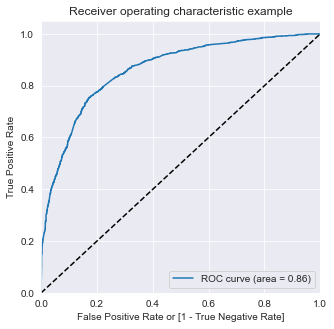

In [83]:
draw_roc(y_train_pres_final.Convert,y_train_pres_final.Convert_Prob)

#### Finding Optimal cutoff point

In [84]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pres_final[i] = y_train_pres_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pres_final.head()    

,Lead_Num,Convert,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9192,1,0.081582,0,1,0,0,0,0,0,0,0,0,0
1,3516,0,0.456583,0,1,1,1,1,1,0,0,0,0,0
2,1888,0,0.239766,0,1,1,1,0,0,0,0,0,0,0
3,90,0,0.092774,0,1,0,0,0,0,0,0,0,0,0
4,1327,1,0.688095,1,1,1,1,1,1,1,1,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pres_final.Convert, y_train_pres_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480834  1.000000  0.000000
0.1   0.1  0.575880  0.986014  0.196028
0.2   0.2  0.696256  0.939860  0.470639
0.3   0.3  0.757229  0.891375  0.632988
0.4   0.4  0.781663  0.830303  0.736615
0.5   0.5  0.788612  0.734266  0.838946
0.6   0.6  0.775611  0.668998  0.874352
0.7   0.7  0.740417  0.553380  0.913644
0.8   0.8  0.707913  0.448019  0.948618
0.9   0.9  0.643354  0.275058  0.984456


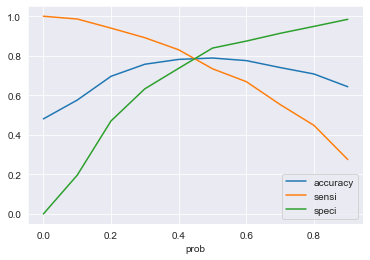

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<b> - From the above graph we can select 0.42 as a cutoff probability for the given model

In [87]:
# Prediction based on the 0.42 cutoff
y_train_pres_final['Predicted'] = y_train_pres_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0 )
y_train_pres_final.head()

,Lead_Num,Convert,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9192,1,0.081582,0,1,0,0,0,0,0,0,0,0,0
1,3516,0,0.456583,1,1,1,1,1,1,0,0,0,0,0
2,1888,0,0.239766,0,1,1,1,0,0,0,0,0,0,0
3,90,0,0.092774,0,1,0,0,0,0,0,0,0,0,0
4,1327,1,0.688095,1,1,1,1,1,1,1,1,0,0,0


<b> Final DataFrame with Lead Score - Train Data

In [88]:
y_train_pres_final['Lead Score'] = y_train_pres_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pres_final = y_train_pres_final[['Lead_Num','Convert','Convert_Prob','Predicted','Lead Score']]
y_train_pres_final.head()

,Lead_Num,Convert,Convert_Prob,Predicted,Lead Score
0,9192,1,0.081582,0,8
1,3516,0,0.456583,1,46
2,1888,0,0.239766,0,24
3,90,0,0.092774,0,9
4,1327,1,0.688095,1,69


#### Confusion Matrix

In [89]:
conf = metrics.confusion_matrix(y_train_pres_final.Convert, y_train_pres_final.Predicted)
print(conf)

[[1824  492]
 [ 460 1685]]


#### Accuracy_score

In [90]:
metrics.accuracy_score(y_train_pres_final.Convert, y_train_pres_final.Predicted)

0.7865949338713293

#### Precision_score

In [91]:
metrics.precision_score(y_train_pres_final.Convert, y_train_pres_final.Predicted)

0.7740009186954525

#### Recall_score

In [92]:
metrics.recall_score(y_train_pres_final.Convert, y_train_pres_final.Predicted)

0.7855477855477856

<b> F1_score

In [93]:
f1_score(y_train_pres_final.Convert, y_train_pres_final.Predicted)

0.7797316057380842

#### Precision and Recall Trade off

In [94]:
p,r,thresholds = precision_recall_curve(y_train_pres_final.Convert, y_train_pres_final.Convert_Prob)

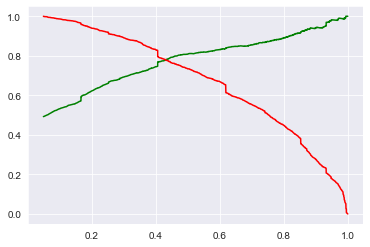

In [95]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## F. Making Prediction on test dataset

#### Sacaling the numeric variables in test dataset

In [96]:
# Sacaling the numeric variables in test dataset
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scalar.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
X_test = X_test[c_rfe]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,WIYCO_Working Professional,LNA_Modified,LNA_Olark Chat Conversation,LNA_Unreachable
1077,0,-0.367070,1,0,0,0,1,0,0,0,0,0,0
2079,0,-0.342415,1,0,0,0,1,0,0,0,0,0,0
2325,0,-0.868978,0,0,0,0,0,0,0,0,0,0,0
1132,0,-0.948227,0,0,0,0,0,0,1,0,1,0,0
7181,0,1.365832,0,0,0,0,0,0,0,0,0,0,0


In [97]:
X_test.shape

(1912, 13)

#### Prediction based on 0.42 threshold

In [98]:
# adding constant
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [99]:
y_test_pred[:10]

array([0.24796663, 0.25304964, 0.1297984 , 0.21288012, 0.63443093,
       0.88961047, 0.03830136, 0.12638897, 0.61850646, 0.26410405])

In [100]:
#Creating Dataframe for actual lead convertion and probability of lead 
y_test_pred_final = pd.DataFrame({"Lead_num":y_test.index, "Converted": y_test.values, "Conv_prob": y_test_pred})
y_test_pred_final.head()

,Lead_num,Converted,Conv_prob
0,1077,1,0.247967
1,2079,1,0.253050
2,2325,0,0.129798
3,1132,1,0.212880
4,7181,0,0.634431


In [101]:
# Appliying the threshold of 0.42 for lead prediction 

y_test_pred_final['predicted'] = y_test_pred_final.Conv_prob.map(lambda x: 1 if x>0.42 else 0)
y_test_pred_final.head()

,Lead_num,Converted,Conv_prob,predicted
0,1077,1,0.247967,0
1,2079,1,0.253050,0
2,2325,0,0.129798,0
3,1132,1,0.212880,0
4,7181,0,0.634431,1


<b> Final DataFrame with Lead Score - Test Dataset

In [102]:
y_test_pred_final['Lead Score'] = y_test_pred_final.Conv_prob.map(lambda x: round(x*100))
y_test_pred_final = y_test_pred_final[['Lead_num','Converted','Conv_prob','predicted','Lead Score']]
y_test_pred_final.head()

,Lead_num,Converted,Conv_prob,predicted,Lead Score
0,1077,1,0.247967,0,25
1,2079,1,0.253050,0,25
2,2325,0,0.129798,0,13
3,1132,1,0.212880,0,21
4,7181,0,0.634431,1,63


#### Evaluation matrix

In [103]:
# looking at the confusion matrix
confusion2 = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
confusion2

array([[795, 197],
       [180, 740]], dtype=int64)

In [104]:
# accuracy_score
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.8028242677824268

In [105]:
# precision_score
metrics.precision_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.7897545357524013

In [106]:
# recall_score
metrics.recall_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.8043478260869565

In [107]:
# f1 score
f1_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.7969843834141088

# Final Observations

- The 'Logistic regression model' is applied for prediction of the leads on education company named X Education sells online courses to industry professionals

In [108]:
print('Out of provided dataset, the logistic regression model selects {} variables for lead prediction and they are as follows:{}'.format(len(X_test.columns), list(X_test.columns)))

Out of provided dataset, the logistic regression model selects 13 variables for lead prediction and they are as follows:['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent', 'WIYCO_Working Professional', 'LNA_Modified', 'LNA_Olark Chat Conversation', 'LNA_Unreachable']


- Let us compare the observations on train and test data

<b><u> Train Data

- Accuracy   : 78.65%

- Precision  : 77.40%

- Recall     : 78.55%
    
- F1 Score   : 77.97

<b><u> Test Data

- Accuracy   : 80.28%

- Precision  : 78.97%

- Recall     : 80.43%
    
- F1 Score   : 79.69%